In [53]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [ ]:
df = pd.read_csv (r'/Users/sehan/Documents/Data_Collection-26-08/encoded2.csv')
display(df)

In [34]:
df = df.iloc[: , 1:]

In [35]:
display(df)

,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,sTtl,...,54,af11,af12,af41,cs0,cs4,cs6,cs7,ef,nan
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,58.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,58.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,0.0,0.0,117.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,0.0,0.0,117.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,0.0,0.0,117.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,186.0,186.0,252.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1215886,3,0.235607,0.235607,0.235607,0.235607,0.235607,0.235607,186.0,40.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1215887,764,0.099927,0.099927,0.099927,0.099927,0.099927,0.099927,0.0,0.0,64.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1215888,3,1.307852,1.307852,1.307852,1.307852,1.307852,1.307852,186.0,40.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
df = df.drop(columns=['Attack Type', 'Attack Tool'])

In [37]:
df = df.fillna(df.median())

In [38]:
display(df)

,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,sTtl,...,54,af11,af12,af41,cs0,cs4,cs6,cs7,ef,nan
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,58.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,58.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,0.0,0.0,117.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,0.0,0.0,117.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,0.0,0.0,117.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,186.0,186.0,252.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1215886,3,0.235607,0.235607,0.235607,0.235607,0.235607,0.235607,186.0,40.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1215887,764,0.099927,0.099927,0.099927,0.099927,0.099927,0.099927,0.0,0.0,64.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1215888,3,1.307852,1.307852,1.307852,1.307852,1.307852,1.307852,186.0,40.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
df = df.drop(columns=['sVid', 'dVid','54'])

In [40]:
display(df)

,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,sTtl,...,52,af11,af12,af41,cs0,cs4,cs6,cs7,ef,nan
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,58.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,58.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,0.0,0.0,117.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,0.0,0.0,117.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,0.0,0.0,117.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,186.0,186.0,252.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1215886,3,0.235607,0.235607,0.235607,0.235607,0.235607,0.235607,186.0,40.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1215887,764,0.099927,0.099927,0.099927,0.099927,0.099927,0.099927,0.0,0.0,64.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1215888,3,1.307852,1.307852,1.307852,1.307852,1.307852,1.307852,186.0,40.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
X = df.drop("Label",1)   #Feature Matrix
y = df["Label"]          #Target Variable

In [42]:
#test and train split (30% for test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)


In [43]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data 

,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,sTtl,...,af11,af12,af41,cs0,cs4,cs6,cs7,ef,nan,Label
422235,102981,2.581060,2.581060,2.581060,2.581060,2.581060,2.581060,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign
100416,47461,4.550162,4.550162,4.550162,4.550162,4.550162,4.550162,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Malicious
6588,6306,0.190589,0.190589,0.190589,0.190589,0.190589,0.190589,0.0,0.0,64.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign
314850,109186,2.581985,2.581985,2.581985,2.581985,2.581985,2.581985,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign
1139122,29563,2.527121,2.527121,2.527121,2.527121,2.527121,2.527121,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,69775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign
152315,41896,4.556148,4.556148,4.556148,4.556148,4.556148,4.556148,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Malicious
963395,26237,2.576286,2.576286,2.576286,2.576286,2.576286,2.576286,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,UDPFlood
117952,16251,2.296557,2.296557,2.296557,2.296557,2.296557,2.296557,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Malicious


In [44]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,sTtl,...,af11,af12,af41,cs0,cs4,cs6,cs7,ef,nan,Label
421870,102332,2.576060,2.576060,2.576060,2.576060,2.576060,2.576060,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign
572782,1109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Malicious
369653,88900,2.567603,2.567603,2.567603,2.567603,2.567603,2.567603,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign
207357,35925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Malicious
527132,7016,4.376126,4.376126,4.376126,4.376126,4.376126,4.376126,0.0,0.0,249.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847883,58357,2.592885,2.592885,2.592885,2.592885,2.592885,2.592885,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,UDPFlood
629006,23295,3.691014,3.691014,3.691014,3.691014,3.691014,3.691014,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Malicious
251865,88015,2.777119,2.777119,2.777119,2.777119,2.777119,2.777119,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign
760347,8012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,40.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Malicious


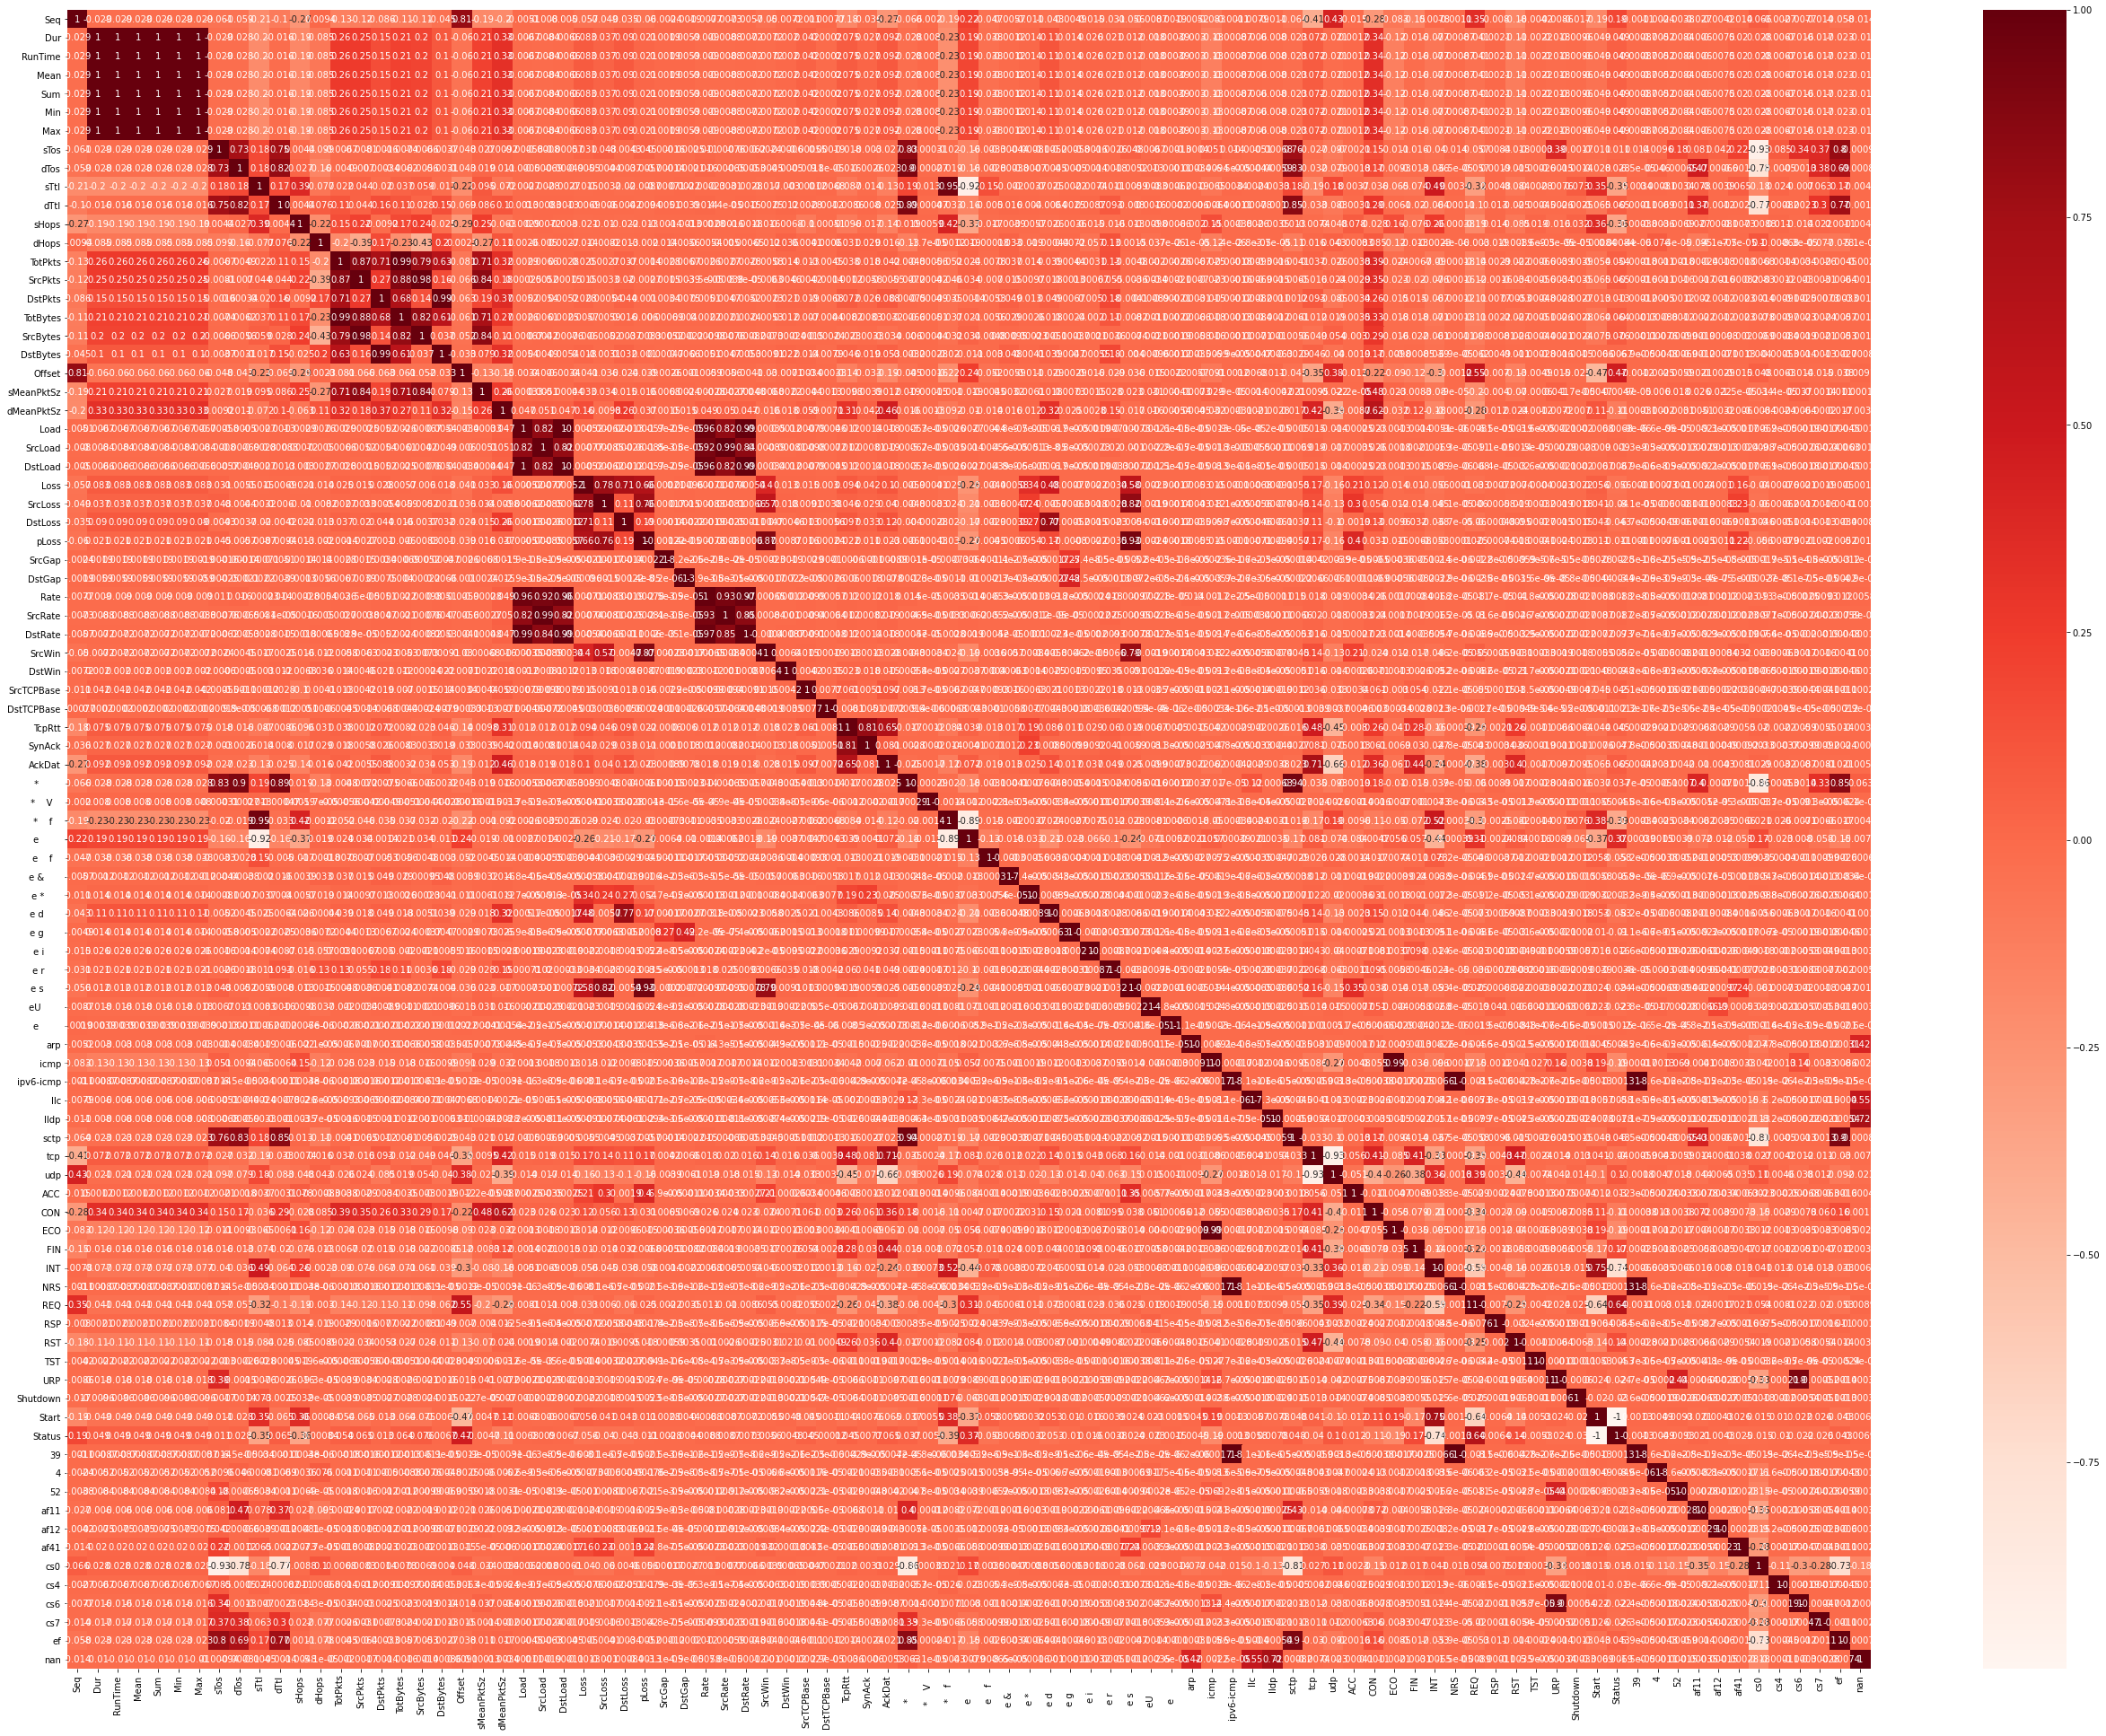

In [45]:
#Using Pearson Correlation
plt.figure(figsize=(45, 34))
cor = train_data.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [46]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if  abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [47]:
corr_features = correlation(train_data, 0.90)
len(set(corr_features))

23

In [48]:
corr_features

{' *    f   ',
 ' e        ',
 ' e s      ',
 '39',
 'DstBytes',
 'DstLoad',
 'DstRate',
 'ECO',
 'Max',
 'Mean',
 'Min',
 'NRS',
 'Rate',
 'RunTime',
 'SrcBytes',
 'SrcRate',
 'Status',
 'Sum',
 'TotBytes',
 'cs0',
 'ef',
 'sctp',
 'udp'}

In [49]:
import pandas
pandas.set_option('display.max_rows', None)

In [50]:
top = train_data.corrwith(train_data["Label"])
display(top)

KeyboardInterrupt: 

In [16]:
top = top.drop([' e        ', 'DstBytes', 'DstLoad', 'DstPkts', 'ECO', 'Max', 'Mean', 'Min', 'RunTime', 'SrcRate', 'Sum', 'pLoss'], axis=0)

In [17]:
display(top)

Dur          -0.075601
IdleTime     -0.028158
sTtl         -0.402824
dTtl         -0.562927
sHops        -0.121578
dHops        -0.277891
TotPkts      -0.313170
SrcPkts      -0.409042
TotBytes     -0.313687
SrcBytes     -0.382140
Offset        0.049753
sMeanPktSz   -0.586275
dMeanPktSz   -0.309784
Load          0.002067
SrcLoad      -0.017765
Loss          0.039236
SrcLoss       0.044073
DstLoss       0.010298
Rate         -0.009414
DstRate      -0.005708
SrcWin       -0.115640
DstWin        0.041482
SrcTCPBase   -0.023536
DstTCPBase   -0.002806
TcpRtt        0.024803
SynAck        0.011245
AckDat        0.023935
 e &         -0.028903
 e *          0.004907
 e d          0.013665
 e g         -0.037960
 e i         -0.132709
 e r         -0.166214
 e s          0.054293
e            -0.004386
e s           0.000260
icmp          0.095541
tcp           0.070020
udp          -0.171260
ACC           0.048298
CLO          -0.011194
CON          -0.530657
ECR           0.002294
FIN        

In [18]:
top = top.drop(['Label'], axis=0)
top_abs = top.abs()
display(top_abs)

Dur           0.075601
IdleTime      0.028158
sTtl          0.402824
dTtl          0.562927
sHops         0.121578
dHops         0.277891
TotPkts       0.313170
SrcPkts       0.409042
TotBytes      0.313687
SrcBytes      0.382140
Offset        0.049753
sMeanPktSz    0.586275
dMeanPktSz    0.309784
Load          0.002067
SrcLoad       0.017765
Loss          0.039236
SrcLoss       0.044073
DstLoss       0.010298
Rate          0.009414
DstRate       0.005708
SrcWin        0.115640
DstWin        0.041482
SrcTCPBase    0.023536
DstTCPBase    0.002806
TcpRtt        0.024803
SynAck        0.011245
AckDat        0.023935
 e &          0.028903
 e *          0.004907
 e d          0.013665
 e g          0.037960
 e i          0.132709
 e r          0.166214
 e s          0.054293
e             0.004386
e s           0.000260
icmp          0.095541
tcp           0.070020
udp           0.171260
ACC           0.048298
CLO           0.011194
CON           0.530657
ECR           0.002294
FIN        

In [19]:
top_abs = top_abs.to_frame('Absolute PCC')

In [20]:
display(top_abs)

,Absolute PCC
Dur,0.075601
IdleTime,0.028158
sTtl,0.402824
dTtl,0.562927
sHops,0.121578
dHops,0.277891
TotPkts,0.313170
SrcPkts,0.409042
TotBytes,0.313687
SrcBytes,0.382140


In [21]:
top_abs.index.name = 'Features'
display(top_abs)

,Absolute PCC
Features,
Dur,0.075601
IdleTime,0.028158
sTtl,0.402824
dTtl,0.562927
sHops,0.121578
dHops,0.277891
TotPkts,0.313170
SrcPkts,0.409042
TotBytes,0.313687


In [22]:
top_sorted = top.sort_values()
display(top_sorted)

Features
sMeanPktSz   -0.586275
dTtl         -0.562927
CON          -0.530657
SrcPkts      -0.409042
sTtl         -0.402824
SrcBytes     -0.382140
TotBytes     -0.313687
TotPkts      -0.313170
dMeanPktSz   -0.309784
dHops        -0.277891
udp          -0.171260
 e r         -0.166214
 e i         -0.132709
sHops        -0.121578
SrcWin       -0.115640
Dur          -0.075601
 e g         -0.037960
RSP          -0.035984
URP          -0.032955
FIN          -0.031316
 e &         -0.028903
IdleTime     -0.028158
SrcTCPBase   -0.023536
SrcLoad      -0.017765
CLO          -0.011194
Rate         -0.009414
DstRate      -0.005708
e            -0.004386
DstTCPBase   -0.002806
e s           0.000260
URH           0.000936
TST           0.001039
PAR           0.001601
Load          0.002067
ECR           0.002294
SRC           0.004385
 e *          0.004907
nan           0.008086
DstLoss       0.010298
SynAck        0.011245
 e d          0.013665
AckDat        0.023935
TcpRtt        0.024803
Lo

In [23]:
df = df.drop(columns=[' e        ', 'DstBytes', 'DstLoad', 'DstPkts', 'ECO', 'Max', 'Mean', 'Min','RunTime', 'SrcRate', 'Sum', 'pLoss'])

In [24]:
X = df.drop("Label",1)   #Feature Matrix
y = df["Label"] 

In [25]:
from sklearn.feature_selection import SelectKBest, chi2

In [26]:
selector = SelectKBest(chi2, k=10).fit(X,y)

selected_features_df = pd.DataFrame({'Features':list(X.columns),'Scores':selector.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)
#X_new = selector.transform(X)
#scores = selector.scores_

,Features,Scores
22,SrcTCPBase,1.419429e+11
14,SrcLoad,1.091107e+11
8,TotBytes,5.827505e+10
13,Load,4.387128e+10
9,SrcBytes,3.471654e+10
10,Offset,5.756779e+09
23,DstTCPBase,1.136704e+09
20,SrcWin,1.856636e+08
18,Rate,1.336199e+08
21,DstWin,7.574838e+07


In [27]:
selected_features_df.columns

Index(['Features', 'Scores'], dtype='object')

In [28]:
selected_features_df.Features.dtype

dtype('O')

In [30]:
#selected_features_df = selected_features_df.drop('Features', axis=1)
df_norm = (selected_features_df.Scores-selected_features_df.Scores.min())/(selected_features_df.Scores.max()-selected_features_df.Scores.min())
df_norm = pd.concat((selected_features_df.Features, df_norm), 1)
 
print("Scaled Dataset Using Pandas")
display(df_norm)

Scaled Dataset Using Pandas


,Features,Scores
0,Dur,9.182656e-08
1,IdleTime,7.310063e-10
2,sTtl,6.824088e-07
3,dTtl,1.380461e-06
4,sHops,5.037728e-07
5,dHops,1.125245e-07
6,TotPkts,1.984701e-04
7,SrcPkts,9.511207e-05
8,TotBytes,4.105528e-01
9,SrcBytes,2.445810e-01


In [50]:
a, b = 0, 1
x, y = selected_features_df.Scores.min(), selected_features_df.Scores.max()
selected_features_df['normal'] = (selected_features_df.Scores - x) / (y - x) * (b - a) + a
print (selected_features_df)

      Features        Scores        normal
0          Dur  1.303417e+04  9.182656e-08
1     IdleTime  1.038015e+02  7.310063e-10
2         sTtl  9.686312e+04  6.824088e-07
3         dTtl  1.959467e+05  1.380461e-06
4        sHops  7.150701e+04  5.037728e-07
5        dHops  1.597209e+04  1.125245e-07
6      TotPkts  2.817141e+07  1.984701e-04
7      SrcPkts  1.350048e+07  9.511207e-05
8     TotBytes  5.827505e+10  4.105528e-01
9     SrcBytes  3.471654e+10  2.445810e-01
10      Offset  5.756779e+09  4.055701e-02
11  sMeanPktSz  5.980309e+07  4.213180e-04
12  dMeanPktSz  5.685852e+07  4.005733e-04
13        Load  4.387128e+10  3.090770e-01
14     SrcLoad  1.091107e+11  7.686946e-01
15        Loss  2.046727e+03  1.441908e-08
16     SrcLoss  1.848814e+03  1.302477e-08
17     DstLoss  3.428742e+02  2.415295e-09
18        Rate  1.336199e+08  9.413640e-04
19     DstRate  2.827583e+07  1.992057e-04
20      SrcWin  1.856636e+08  1.308016e-03
21      DstWin  7.574838e+07  5.336539e-04
22  SrcTCPB

In [32]:
#top_abs.reset_index(drop=True, inplace=True)
#selected_features_df.reset_index(drop=True, inplace=True)

new = pd.merge(top_abs, df_norm, on='Features')
display(new)

,Features,Absolute PCC,Scores
0,Dur,0.075601,9.182656e-08
1,IdleTime,0.028158,7.310063e-10
2,sTtl,0.402824,6.824088e-07
3,dTtl,0.562927,1.380461e-06
4,sHops,0.121578,5.037728e-07
5,dHops,0.277891,1.125245e-07
6,TotPkts,0.313170,1.984701e-04
7,SrcPkts,0.409042,9.511207e-05
8,TotBytes,0.313687,4.105528e-01
9,SrcBytes,0.382140,2.445810e-01


In [35]:
new['Total'] = new['Absolute PCC'] + new['Scores']
display(new)

,Features,Absolute PCC,Scores,Total
0,Dur,0.075601,9.182656e-08,0.075601
1,IdleTime,0.028158,7.310063e-10,0.028158
2,sTtl,0.402824,6.824088e-07,0.402825
3,dTtl,0.562927,1.380461e-06,0.562928
4,sHops,0.121578,5.037728e-07,0.121578
5,dHops,0.277891,1.125245e-07,0.277891
6,TotPkts,0.313170,1.984701e-04,0.313369
7,SrcPkts,0.409042,9.511207e-05,0.409137
8,TotBytes,0.313687,4.105528e-01,0.724240
9,SrcBytes,0.382140,2.445810e-01,0.626721


In [37]:
new.sort_values('Total', ascending=False)

,Features,Absolute PCC,Scores,Total
22,SrcTCPBase,0.023536,1.000000e+00,1.023536
14,SrcLoad,0.017765,7.686946e-01,0.786459
8,TotBytes,0.313687,4.105528e-01,0.724240
9,SrcBytes,0.382140,2.445810e-01,0.626721
11,sMeanPktSz,0.586275,4.213180e-04,0.586696
3,dTtl,0.562927,1.380461e-06,0.562928
41,CON,0.530657,1.561801e-06,0.530659
7,SrcPkts,0.409042,9.511207e-05,0.409137
2,sTtl,0.402824,6.824088e-07,0.402825
6,TotPkts,0.313170,1.984701e-04,0.313369
